In [33]:
# Load packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
import pandas as pd
pd.set_option('max_rows', 6)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# import cmocean.cm as cmo
import csv
import statsmodels.api as sm
from scipy import stats

# mpl.rcParams['mathtext.fontset'] = 'cm'
# mpl.rcParams['mathtext.rm'] = 'serif'

x = "Year CE"
phe = r'$\mathrm{\delta}^{15}$N Phe ('u"\u2030)"
eaa_neaa = ['Phe', 'Thr', 'Ile', 'Leu', 'Val', 'Asx', 'Glx', 'Pro', 'Ala', 'Ser', 'Gly'] # For Essential/Non-Essential ordering
tr_srcaa = ['Glu', 'Asp', 'Ala', 'Ile', 'Leu', 'Pro', 'Val', 'Gly', 'Ser', 'Lys', 'Tyr', 'Phe', 'Thr'] # For Trophic/Source AA ordering
n = r'$\mathrm{\delta}^{15}$N ['u"\u2030]"
c = r'$\mathrm{\delta}^{13}$C ['u"\u2030]"
deg = u'SST [\u00B0C]'

# Import data
path1 = '~/Documents/GitHub/data/schiff_bulk_years_09-04-2019.csv'
path2 = '~/Documents/GitHub/data/schiff_bulk_years_jack4907_12-15-2019.csv'
path3 = '~/Documents/GitHub/data/schiff_bulk_years_sav_12-15-2019.csv'
path4 = '~/Documents/GitHub/data/schiff_bulk_years_stetson_12-15-2019.csv'
path5 = '~/Documents/GitHub/data/schiff_bulk_years_sav_12-22-2019.csv'

df = pd.read_csv(path3, comment = '#')
df.rename(columns={"d15n.vs.air": "d15n", "d13c.vs.vpdb": "d13c", "linear.ad" : "yrAD", "coral.id" : "coral"}, inplace = True)

# Round yrAD column to make things easier
df.yrAD = df.yrAD.round(0)

# df_jack4684 = df[df.coral == 'jack-4684-bc-unk']
# df_jack4686t1 = df[df.coral == 'jack-4686-bc-d1-t1']

# df_stet = df[df.coral == 'stet-4904-bc1-d2']
# df_jack4907 = df[df.coral == 'jack-4907-bc1-d3']
df_sav = df[df.coral == 'sav-4902-bc1-unk']
# df_jack4684 = df[df.coral == 'jack-4684-bc-unk']
# df_jack4686 = df[df.coral == 'jack-4686-bc-d1-t1']

print(df)

     Unnamed: 0             coral sampler  sample.no.  distance..mm.  d15n  \
0             1  sav-4902-bc1-unk    usgs           2           0.34  8.95   
1             2  sav-4902-bc1-unk    usgs           3           0.52  9.22   
2             3  sav-4902-bc1-unk    usgs           4           0.68  8.34   
..          ...               ...     ...         ...            ...   ...   
137         138  sav-4902-bc1-unk    usgs         143          44.04  7.60   
138         139  sav-4902-bc1-unk    usgs         144          44.45  7.48   
139         140  sav-4902-bc1-unk    usgs         145          44.92  8.52   

      d13c treatment  perc.n  perc.c  cn.ratio  machine   X  X.1  yrAD  
0   -16.09         a     NaN     NaN       NaN      NaN NaN  NaN  1348  
1   -15.98         a     NaN     NaN       NaN      NaN NaN  NaN  1341  
2   -15.79         a     NaN     NaN       NaN      NaN NaN  NaN  1334  
..     ...       ...     ...     ...       ...      ...  ..  ...   ...  
137 -17.86

## Calculate mean and standard deviation

In [34]:
df = df

meand15n = np.mean(df['d15n'])
meand13c = np.mean(df['d13c'])
d15n_std1 = np.std(df['d15n'])
d13c_std2 = np.std(df['d13c'])
d15n_max = np.amax(df['d15n'])
d15n_min = np.amin(df['d15n'])

print(meand15n)
print(meand13c)
print(d15n_std1)
print(d13c_std2)
print(d15n_max)
print(d15n_min)

8.969857142857144
-16.07136690647482
0.7206514768044316
0.550752528268393
10.89
7.44


### Calculate Trophic Position based on bulk d15N

In [2]:
# TP = ((d15Nconsumer - d15Nproducer)/3.4) + 1
d15Nprod = 2.1 # Based on communication with Nancy

In [15]:
myfile = '~/Documents/GitHub/data/cleaned_ndata_12-22-2019.csv'
ndata = pd.read_csv(myfile, sep=',') 
ndata

,Sample ID,Sample ID2,Type,Region,Bulk,Glu,Asp,Ala,Ile,Leu,...,Lys,Tyr,Phe,Thr,Met,Arg,TP,Sum V,Year CE,yrBP
0,sav-4902-bc1_2,Savannah Banks-4902,Black Coral - SEUS,SEUS,8.95,14.26,13.56,16.14,20.67,19.28,...,NaN,NaN,8.43,NaN,NaN,NaN,1.319737,3.764898,1345.0,605.0
1,sav-4902-bc1_7,Savannah Banks-4902,Black Coral - SEUS,SEUS,9.02,14.16,18.95,20.76,24.40,23.31,...,NaN,NaN,7.32,NaN,NaN,NaN,1.452632,3.937959,1305.0,645.0
2,sav-4902-bc1_15,Savannah Banks-4902,Black Coral - SEUS,SEUS,9.97,17.29,14.35,18.60,23.82,22.69,...,NaN,NaN,11.00,NaN,NaN,NaN,1.380263,4.131837,1174.0,776.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,E 500-1000,POM,POM - E NA,Eastern North Atlantic,3.80,12.70,10.00,13.70,8.80,9.20,...,2.2,NaN,0.00,-10.2,NaN,NaN,2.223684,1.342857,NaN,NaN
43,E 1000-2000,POM,POM - E NA,Eastern North Atlantic,4.10,13.90,11.10,15.10,10.80,10.60,...,4.2,NaN,0.70,-12.3,NaN,NaN,2.289474,1.428571,NaN,NaN
44,E >2000,POM,POM - E NA,Eastern North Atlantic,3.90,14.10,10.70,15.40,11.40,11.60,...,2.6,NaN,0.20,-12.6,NaN,NaN,2.381579,1.363265,NaN,NaN


In [16]:
filter1 = ndata[(ndata['Region'] == 'SEUS') | (ndata['Region'] == 'Gulf of Mexico')]
filter2 = ndata[(ndata['Region'] == 'SEUS')]
ndata = filter2
ndata

,Sample ID,Sample ID2,Type,Region,Bulk,Glu,Asp,Ala,Ile,Leu,...,Lys,Tyr,Phe,Thr,Met,Arg,TP,Sum V,Year CE,yrBP
0,sav-4902-bc1_2,Savannah Banks-4902,Black Coral - SEUS,SEUS,8.95,14.26,13.56,16.14,20.67,19.28,...,NaN,NaN,8.43,NaN,NaN,NaN,1.319737,3.764898,1345.0,605.0
1,sav-4902-bc1_7,Savannah Banks-4902,Black Coral - SEUS,SEUS,9.02,14.16,18.95,20.76,24.40,23.31,...,NaN,NaN,7.32,NaN,NaN,NaN,1.452632,3.937959,1305.0,645.0
2,sav-4902-bc1_15,Savannah Banks-4902,Black Coral - SEUS,SEUS,9.97,17.29,14.35,18.60,23.82,22.69,...,NaN,NaN,11.00,NaN,NaN,NaN,1.380263,4.131837,1174.0,776.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,jack-4684-bc1_41,Jacksonville-4684,Black Coral - SEUS,SEUS,8.31,13.98,11.76,15.31,19.51,18.58,...,NaN,NaN,5.91,NaN,NaN,NaN,1.614474,3.434286,1856.0,94.0
14,jack-4684-bc1_85,Jacksonville-4684,Black Coral - SEUS,SEUS,8.02,15.99,14.19,14.70,21.06,18.38,...,NaN,NaN,6.76,NaN,NaN,NaN,1.767105,3.161633,1778.0,172.0
15,jack-4684-bc1_155,Jacksonville-4684,Black Coral - SEUS,SEUS,7.85,15.37,14.00,14.10,20.64,18.11,...,NaN,NaN,7.29,NaN,NaN,NaN,1.615789,3.026122,NaN,NaN


In [35]:
# TP = ((d15Nconsumer - d15Nproducer)/3.4) + 1

ndata['TP_bulk'] = ((ndata['Bulk'] - d15Nprod)/3.4 +1)
ndata

/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sample ID,Sample ID2,Type,Region,Bulk,Glu,Asp,Ala,Ile,Leu,...,Phe,Thr,Met,Arg,TP,Sum V,Year CE,yrBP,TP-bulk,TP_bulk
0,sav-4902-bc1_2,Savannah Banks-4902,Black Coral - SEUS,SEUS,8.95,14.26,13.56,16.14,20.67,19.28,...,8.43,NaN,NaN,NaN,1.319737,3.764898,1345.0,605.0,3.014706,3.014706
1,sav-4902-bc1_7,Savannah Banks-4902,Black Coral - SEUS,SEUS,9.02,14.16,18.95,20.76,24.40,23.31,...,7.32,NaN,NaN,NaN,1.452632,3.937959,1305.0,645.0,3.035294,3.035294
2,sav-4902-bc1_15,Savannah Banks-4902,Black Coral - SEUS,SEUS,9.97,17.29,14.35,18.60,23.82,22.69,...,11.00,NaN,NaN,NaN,1.380263,4.131837,1174.0,776.0,3.314706,3.314706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,jack-4684-bc1_41,Jacksonville-4684,Black Coral - SEUS,SEUS,8.31,13.98,11.76,15.31,19.51,18.58,...,5.91,NaN,NaN,NaN,1.614474,3.434286,1856.0,94.0,2.826471,2.826471
14,jack-4684-bc1_85,Jacksonville-4684,Black Coral - SEUS,SEUS,8.02,15.99,14.19,14.70,21.06,18.38,...,6.76,NaN,NaN,NaN,1.767105,3.161633,1778.0,172.0,2.741176,2.741176
15,jack-4684-bc1_155,Jacksonville-4684,Black Coral - SEUS,SEUS,7.85,15.37,14.00,14.10,20.64,18.11,...,7.29,NaN,NaN,NaN,1.615789,3.026122,NaN,NaN,2.691176,2.691176


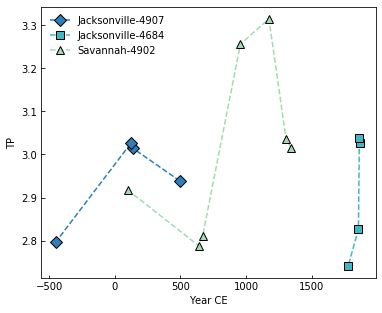

In [47]:
# Subset the data
# NOTE: It is possible to write a for loop to do this, but I am doing this to save time
# https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

n_jack = ndata[ndata['Sample ID2']=='Jacksonville-4907']
n_jack2 = ndata[ndata['Sample ID2']=='Jacksonville-4684']
n_sav = ndata[ndata['Sample ID2']=='Savannah Banks-4902']
markersize = 8

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("Year CE")
# ax.set_ylabel(r'Phe $\mathrm{\delta}^{15}$N ['u"\u2030]")
ax.set_ylabel('TP')

plt.plot('Year CE', 'TP_bulk', data = n_jack, label = "Jacksonville-4907", marker = "D", linestyle = "--", color = "#2c7fb8", markeredgecolor = "k", markersize = markersize)
plt.plot('Year CE', 'TP_bulk', data = n_jack2, label = "Jacksonville-4684", marker = "s", linestyle = "--", color = "#41b6c4", markeredgecolor = "k", markersize = markersize)
plt.plot('Year CE', 'TP_bulk', data = n_sav, label = "Savannah-4902", marker = "^", linestyle = "--", color = "#a1dab4", markeredgecolor = "k", markersize = markersize)

ax.tick_params(direction='in')
               
# Legend
plt.legend(frameon=False)

# Save figure
# plt.savefig('fig_phe_time_2.png', dpi=300, bbox_inches='tight')

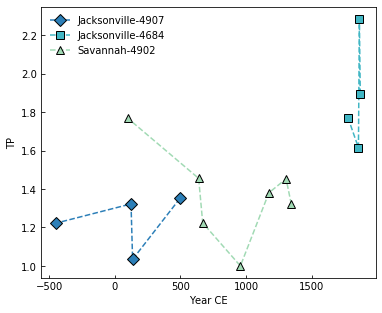

In [33]:
# Subset the data
# NOTE: It is possible to write a for loop to do this, but I am doing this to save time
# https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

n_jack = ndata[ndata['Sample ID2']=='Jacksonville-4907']
n_jack2 = ndata[ndata['Sample ID2']=='Jacksonville-4684']
n_sav = ndata[ndata['Sample ID2']=='Savannah Banks-4902']
markersize = 8

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("Year CE")
# ax.set_ylabel(r'Phe $\mathrm{\delta}^{15}$N ['u"\u2030]")
ax.set_ylabel('TP')

plt.plot('Year CE', 'TP', data = n_jack, label = "Jacksonville-4907", marker = "D", linestyle = "--", color = "#2c7fb8", markeredgecolor = "k", markersize = markersize)
plt.plot('Year CE', 'TP', data = n_jack2, label = "Jacksonville-4684", marker = "s", linestyle = "--", color = "#41b6c4", markeredgecolor = "k", markersize = markersize)
plt.plot('Year CE', 'TP', data = n_sav, label = "Savannah-4902", marker = "^", linestyle = "--", color = "#a1dab4", markeredgecolor = "k", markersize = markersize)

ax.tick_params(direction='in')
               
# Legend
plt.legend(frameon=False)

# Save figure
# plt.savefig('fig_phe_time_2.png', dpi=300, bbox_inches='tight')

In [41]:
df_stet['tp'] = ((df_stet['d15n'] - d15Nprod)/3.4 +1)
df_stet

,Unnamed: 0,coral,sampler,sample.no.,distance..mm.,d15n,d13c,treatment,perc.n,perc.c,cn.ratio,machine,X,X.1,yrAD,tp
0,1,stet-4904-bc1-d2,john,1,0.001,9.240000,-16.910000,a,NaN,NaN,NaN,NaN,NaN,NaN,2004,3.100000
1,2,stet-4904-bc1-d2,john,2,0.031,9.240000,-16.840000,a,NaN,NaN,NaN,NaN,NaN,NaN,2002,3.100000
2,3,stet-4904-bc1-d2,john,3,0.061,9.630000,-16.910000,b,NaN,NaN,NaN,delta v plus,NaN,NaN,1999,3.214706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,384,stet-4904-bc1-d2,john,384,11.491,7.330000,-16.390000,a,NaN,NaN,NaN,delta v plus,NaN,NaN,431,2.538235
384,385,stet-4904-bc1-d2,john,385,11.521,7.170000,-16.790000,a,NaN,NaN,NaN,delta v plus,NaN,NaN,427,2.491176
385,386,stet-4904-bc1-d2,john,386,11.551,7.118105,-16.582813,NaN,NaN,NaN,2.95,delta v plus,NaN,NaN,423,2.475913


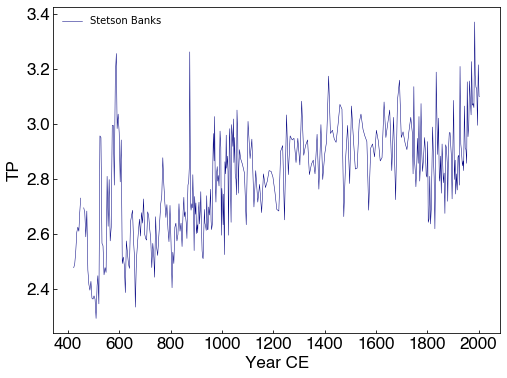

In [45]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot('yrAD', 'tp', data=df_stet, color = 'navy', linewidth = 0.5, label = 'Stetson Banks')

# ax.fill_between(x, y1, y2, facecolor = '#D55E00', interpolate = True, alpha = 0.25)
ax.tick_params(direction='in')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 17)
# ax.set_ylabel(n, fontname = 'Helvetica', size = 17)
ax.set_ylabel('TP', fontname = 'Helvetica', size = 17)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(17)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(17)
# ax.set_xlim(1200, 2010)

plt.legend(frameon=False, loc=0)
# plt.savefig('fig_bulk_n_stet_binned.png', dpi = 300, bbox_inches = 'tight')

## Binning time series
This uses a binning function from the Python library Pyleoclim, which is being developed for paleoclimate analysis.

In [5]:
# Using a binning function from Python package Pyleoclim
# Define the function

import numpy as np
import pandas as pd
import warnings
import copy
from scipy import special
import sys
from scipy import signal

def binvalues(x, y, bin_size=None, start=None, end=None):
    """ Bin the values
    Args:
        x (array): the x-axis series.
        y (array): the y-axis series.
        bin_size (float): The size of the bins. Default is the average resolution
        start (float): Where/when to start binning. Default is the minimum
        end (float): When/where to stop binning. Defulat is the maximum
    Returns:
        binned_values - the binned output \n
        bins - the bins (centered on the median, i.e., the 100-200 bin is 150) \n
        n - number of data points in each bin \n
        error -  the standard error on the mean in each bin
    """

    # Make sure x and y are numpy arrays
    x = np.array(x, dtype='float64')
    y = np.array(y, dtype='float64')

    # Get the bin_size if not available
    if bin_size is None:
        bin_size = np.nanmean(np.diff(x))

    # Get the start/end if not given
    if start is None:
        start = np.nanmin(x)
    if end is None:
        end = np.nanmax(x)

    # Set the bin medians
    bins = np.arange(start+bin_size/2, end + bin_size/2, bin_size)

    # Perform the calculation
    binned_values = []
    n = []
    error = []
    for val in np.nditer(bins):
        idx = [idx for idx, c in enumerate(x) if c >= (val-bin_size/2) and c < (val+bin_size/2)]
        if y[idx].size == 0:
            binned_values.append(np.nan)
            n.append(np.nan)
            error.append(np.nan)
        else:
            binned_values.append(np.nanmean(y[idx]))
            n.append(y[idx].size)
            error.append(np.nanstd(y[idx]))

    return bins, binned_values, n, error


## Nitrogen

In [27]:
# Binning
# Jacksonville-4907 BC1
newdf = binvalues(df_jack4907["yrAD"],df_jack4907["d15n"], bin_size = 100)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape

data=newdf
jack4907_binned = pd.DataFrame({'yrAD': data[:, 0], 'd15n': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
jack4907_binned['upper'] = jack4907_binned['d15n'] + jack4907_binned['Column4']
jack4907_binned['lower'] = jack4907_binned['d15n'] - jack4907_binned['Column4']

In [35]:
# Savannah-4902 BC1
newdf = binvalues(df_sav['yrAD'],df_sav['d15n'], bin_size = 100)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape
data=newdf
sav_binned = pd.DataFrame({'yrAD': data[:, 0], 'd15n': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
sav_binned['upper'] = sav_binned['d15n'] + sav_binned['Column4']
sav_binned['lower'] = sav_binned['d15n'] - sav_binned['Column4']

In [6]:
# Binning the Stetson-4904 BC1 data
newdf = binvalues(df_stet['yrAD'],df_stet['d15n'], bin_size = 100)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape
data=newdf
stet_binned = pd.DataFrame({'yrAD': data[:, 0], 'd15n': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})

stet_binned['upper'] = stet_binned['d15n'] + stet_binned['Column4']
stet_binned['lower'] = stet_binned['d15n'] - stet_binned['Column4']

In [19]:
# print(jack4907_binned)
# print(sav_binned)
# print(stet_binned)

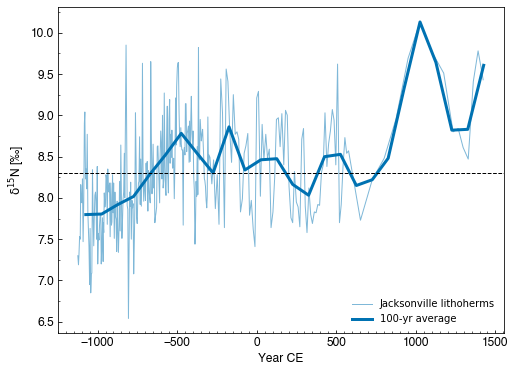

In [32]:
fig, ax = plt.subplots(figsize = (8,6))
data_original = df_jack4907
data_binned = jack4907_binned

x = data_binned['yrAD']
y1 = data_binned['upper']
y2 = data_binned['lower']

ax.plot('yrAD', 'd15n', data=data_original, color = '#0072B2', linewidth = 1, label = 'Jacksonville lithoherms', alpha = 0.5)
ax.plot('yrAD', 'd15n', data=data_binned, color='#0072B2', linewidth = 3, label = '100-yr average')
# ax.plot(x, y1, x, y2, color = 'darkgray', linewidth=1)

# ax.fill_between(x, y1, y2, facecolor = 'darkgray', interpolate = False)
ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
    ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
ax.axhline(y=8.3, color = 'k', linewidth = 1, linestyle = '--')

plt.legend(frameon=False, loc=0)
plt.savefig('fig_bulk_n_jack_binned.png', dpi = 300, bbox_inches = 'tight')

In [8]:
sav_am1 = df_sav

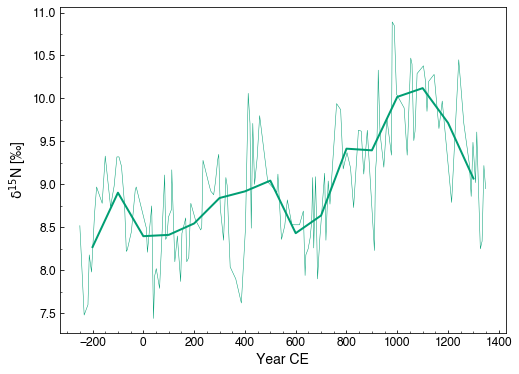

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
data_original = df_sav
data_binned = sav_binned

x = data_binned['yrAD']
y1 = data_binned['upper']
y2 = data_binned['lower']

ax.plot('yrAD', 'd15n', data=data_original, color = '#009E73', linewidth = 0.5)
ax.plot('yrAD', 'd15n', data=data_binned, color='#009E73', linewidth = 2)
# ax.plot(x, y1, x, y2, color = 'darkgray', linewidth=1)

# ax.fill_between(x, y1, y2, facecolor = '#1f78b4', interpolate = True, alpha = 0.25)

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 14)
ax.set_ylabel(n, fontname = 'Helvetica', size = 14)

ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)

plt.savefig('fig_bulk_n_sav_binned3.png', dpi = 300, bbox_inches = 'tight')

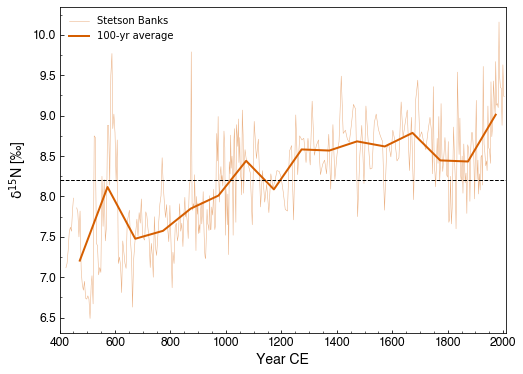

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
data_original = df_stet
data_binned = stet_binned

x = data_binned['yrAD']
y1 = data_binned['upper']
y2 = data_binned['lower']

# #D55E00 original color

ax.plot('yrAD', 'd15n', data=data_original, color = '#D55E00', linewidth = 0.5, label = 'Stetson Banks', alpha = 0.5)
ax.plot('yrAD', 'd15n', data=data_binned, color='#D55E00', linewidth = 2, label = '100-yr average') # 'navy' color
# ax.plot(x, y1, x, y2, color = 'darkgray', linewidth=1)

# ax.fill_between(x, y1, y2, facecolor = 'gray', interpolate = True, alpha = 0.25)
ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 14)
ax.set_ylabel(n, fontname = 'Helvetica', size = 14)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
ax.set_xlim(400, 2010)

ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
ax.axhline(y=8.2, color = 'k', linewidth = 1, linestyle = '--')

plt.legend(frameon=False, loc=0)
plt.savefig('fig_bulk_n_stet_binned.png', dpi = 300, bbox_inches = 'tight')

### Combined Nitrogen

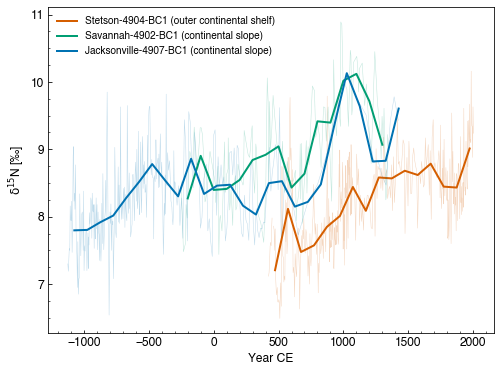

In [53]:
mpl.rc('font',family='Helvetica')

fig, ax = plt.subplots(figsize = (8,6))

# Stetson-4904
x = stet_binned['yrAD']
y1 = stet_binned['upper']
y2 = stet_binned['lower']
ax.plot('yrAD', 'd15n', data=df_stet, color = '#D55E00', linewidth = 0.5, label = '', alpha = 0.25)
ax.plot('yrAD', 'd15n', data=stet_binned, color='#D55E00', linewidth = 2, label = 'Stetson-4904-BC1 (outer continental shelf)')
# ax.fill_between(x, y1, y2, facecolor = 'gray', interpolate = True, alpha = 0.25)

# Savannah-4902 BC1
x = sav_binned['yrAD']
y1 = sav_binned['upper']
y2 = sav_binned['lower']
ax.plot('yrAD', 'd15n', data=df_sav, color = '#009E73', linewidth = 0.5, label = '', alpha = 0.25)
ax.plot('yrAD', 'd15n', data=sav_binned, color='#009E73', linewidth = 2, label = "Savannah-4902-BC1 (continental slope)")
# ax.fill_between(x, y1, y2, facecolor = '#009E73', interpolate = True, alpha = 0.25)

# Jacksonville-4907

x = jack4907_binned['yrAD']
y1 = jack4907_binned['upper']
y2 = jack4907_binned['lower']
ax.plot('yrAD', 'd15n', data=df_jack4907, color = '#0072B2', linewidth = 0.5, label = '', alpha = 0.25)
ax.plot('yrAD', 'd15n', data=jack4907_binned, color='#0072B2', linewidth = 2, label = 'Jacksonville-4907-BC1 (continental slope)')
# ax.fill_between(x, y1, y2, facecolor = 'gray', interpolate = True, alpha = 0.25)
ax.tick_params(direction='in')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)

plt.legend(frameon=False, loc=0)

plt.savefig('fig_bulk_n_grouped_binned.png', dpi = 300, bbox_inches='tight')

## Carbon

In [30]:
# d13c
# Jacksonville-4907 BC1
data=df_jack4907
newdf = binvalues(data["yrAD"],data["d13c"], bin_size = 100)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape

data=newdf
jack_binned_c = pd.DataFrame({'yrAD': data[:, 0], 'd13c': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
jack_binned_c['upper'] = jack_binned_c['d13c'] + jack_binned_c['Column4']
jack_binned_c['lower'] = jack_binned_c['d13c'] - jack_binned_c['Column4']

In [36]:
# d13c
# Savannah-4902 BC1
data=df_sav
newdf = binvalues(data["yrAD"],data["d13c"], bin_size = 100)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape

data=newdf
sav_binned_c = pd.DataFrame({'yrAD': data[:, 0], 'd13c': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
sav_binned_c['upper'] = sav_binned_c['d13c'] + sav_binned_c['Column4']
sav_binned_c['lower'] = sav_binned_c['d13c'] - sav_binned_c['Column4']

In [31]:
# d13c
# Stetson-4904 BC1
data=df_stet
newdf = binvalues(data["yrAD"],data["d13c"], bin_size = 100)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape

data=newdf
stet_binned_c = pd.DataFrame({'yrAD': data[:, 0], 'd13c': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
stet_binned_c['upper'] = stet_binned_c['d13c'] + stet_binned_c['Column4']
stet_binned_c['lower'] = stet_binned_c['d13c'] - stet_binned_c['Column4']

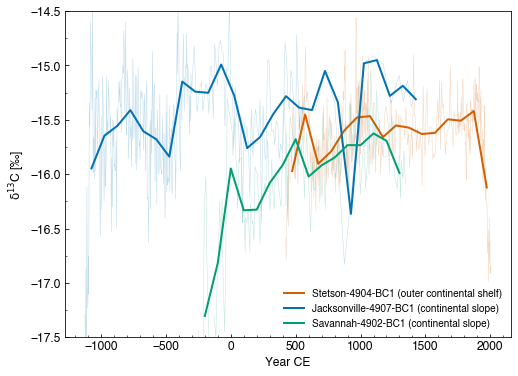

In [58]:
mpl.rc('font',family='Helvetica')

fig, ax = plt.subplots(figsize = (8,6))

# Stetson-4904
x = stet_binned_c['yrAD']
y1 = stet_binned_c['upper']
y2 = stet_binned_c['lower']
ax.plot('yrAD', 'd13c', data=df_stet, color = '#D55E00', linewidth = 0.5, alpha = 0.25, label = '')
ax.plot('yrAD', 'd13c', data=stet_binned_c, color='#D55E00', linewidth = 2, label = 'Stetson-4904-BC1 (outer continental shelf)')
# ax.fill_between(x, y1, y2, facecolor = '#D55E00', interpolate = True, alpha = 0.25)

# Jacksonville-4907

x = jack_binned_c['yrAD']
y1 = jack_binned_c['upper']
y2 = jack_binned_c['lower']
ax.plot('yrAD', 'd13c', data=df_jack4907, color = '#0072B2', linewidth = 0.5, alpha = 0.25, label = '')
ax.plot('yrAD', 'd13c', data=jack_binned_c, color='#0072B2', linewidth = 2, label = 'Jacksonville-4907-BC1 (continental slope)')
# ax.fill_between(x, y1, y2, facecolor = '#0072B2', interpolate = False, alpha = 0.25)

# Savannah-4902 BC1
x = sav_binned_c['yrAD']
y1 = sav_binned_c['upper']
y2 = sav_binned_c['lower']
ax.plot('yrAD', 'd13c', data=df_sav, color = '#009E73', linewidth = 0.5, alpha = 0.25, label = '')
ax.plot('yrAD', 'd13c', data=sav_binned_c, color='#009E73', linewidth = 2, label = 'Savannah-4902-BC1 (continental slope)')
# ax.fill_between(x, y1, y2, facecolor = '#1f78b4', interpolate = True, alpha = 0.25)

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(c, fontname = 'Helvetica', size = 12)
ax.set_ylim(-17.5, -14.5)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)

ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both') 

plt.legend(frameon=False, loc=0)
plt.savefig('fig_bulk_c_jack_stet_sav_binned.png', dpi = 300, bbox_inches='tight')

In [83]:
stet_binned_c

,yrAD,d13c,Column3,Column4,upper,lower
0,498.0,-15.909734,29.0,0.361206,-15.548528,-16.270939
1,598.0,-15.600000,31.0,0.354383,-15.245617,-15.954383
2,698.0,-15.798750,32.0,0.229371,-15.569379,-16.028121
...,...,...,...,...,...,...
13,1798.0,-15.520800,25.0,0.203429,-15.317371,-15.724229
14,1898.0,-15.466667,27.0,0.276271,-15.190395,-15.742938
15,1998.0,-16.490588,17.0,0.346418,-16.144170,-16.837006


### Stetson Banks bulk d13C record

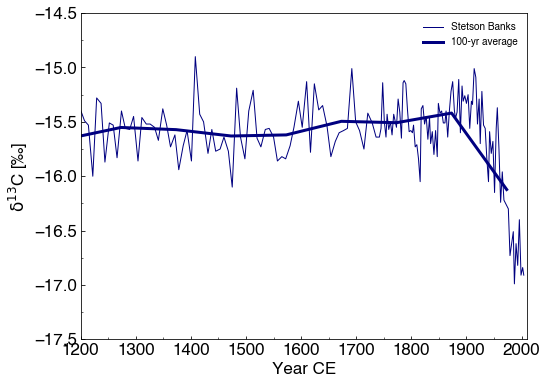

In [57]:
fig, ax = plt.subplots(figsize=(8,6))
data_original = df_stet
data_binned = stet_binned_c

x = data_binned['yrAD']
y1 = data_binned['upper']
y2 = data_binned['lower']

# color: #D55E00

ax.plot('yrAD', 'd13c', data=data_original, color = 'navy', linewidth = 1, label = 'Stetson Banks')
ax.plot('yrAD', 'd13c', data=data_binned, color='navy', linewidth = 3, label = '100-yr average')
# ax.fill_between(x, y1, y2, facecolor = '#D55E00', interpolate = True, alpha = 0.25)
ax.tick_params(direction='in')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 17)
ax.set_ylabel(c, fontname = 'Helvetica', size = 17)
ax.set_ylim(-17.5, -14.5)
ax.set_xlim(1200, 2010)

msize = 18
col = '#F0E442'
outline = 'k'
marker = '*'
# plt.plot(data_original['yrAD'][6], data_original['d13c'][6], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][7], data_original['d13c'][7], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][21], data_original['d13c'][21], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][24], data_original['d13c'][24], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][39], data_original['d13c'][39], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][45], data_original['d13c'][45], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][45], data_original['d13c'][45], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][102], data_original['d13c'][102], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][108], data_original['d13c'][108], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][134], data_original['d13c'][134], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][169], data_original['d13c'][169], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(17)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(17)
    
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both') 
    
plt.legend(frameon=False, loc=0)
plt.savefig('fig_bulk_c_stet_binned-recent.png', dpi = 300, bbox_inches = 'tight')

In [14]:
data_original

,Unnamed: 0,coral,sampler,sample.no.,distance..mm.,d15n,d13c,treatment,perc.n,perc.c,cn.ratio,machine,X,X.1,yrAD
0,1,stet-4904-bc1-d2,john,1,0.001,9.240000,-16.910000,a,NaN,NaN,NaN,NaN,NaN,NaN,2004
1,2,stet-4904-bc1-d2,john,2,0.031,9.240000,-16.840000,a,NaN,NaN,NaN,NaN,NaN,NaN,2002
2,3,stet-4904-bc1-d2,john,3,0.061,9.630000,-16.910000,b,NaN,NaN,NaN,delta v plus,NaN,NaN,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,384,stet-4904-bc1-d2,john,384,11.491,7.330000,-16.390000,a,NaN,NaN,NaN,delta v plus,NaN,NaN,431
384,385,stet-4904-bc1-d2,john,385,11.521,7.170000,-16.790000,a,NaN,NaN,NaN,delta v plus,NaN,NaN,427
385,386,stet-4904-bc1-d2,john,386,11.551,7.118105,-16.582813,NaN,NaN,NaN,2.95,delta v plus,NaN,NaN,423


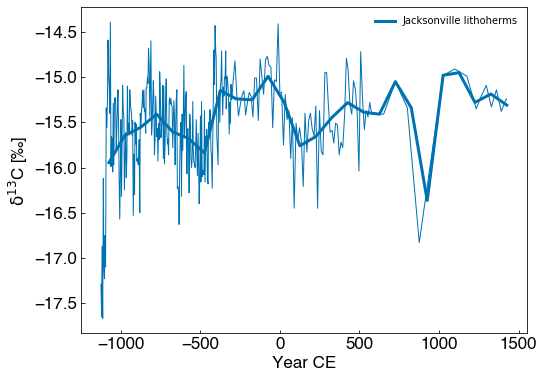

In [10]:
fig, ax = plt.subplots(figsize = (8,6))
data_original = df_jack4907
data_binned = jack_binned_c

x = data_binned['yrAD']
y1 = data_binned['upper']
y2 = data_binned['lower']

ax.plot('yrAD', 'd13c', data=data_original, color = '#0072B2', linewidth = 1, label = '')
ax.plot('yrAD', 'd13c', data=data_binned, color='#0072B2', linewidth = 3, label = 'Jacksonville lithoherms')
# ax.plot(x, y1, x, y2, color = 'darkgray', linewidth=1)

# ax.fill_between(x, y1, y2, facecolor = 'darkgray', interpolate = True, alpha = 0.5)

ax.tick_params(direction='in')

ax.set_xlabel("Year CE", size = 17, fontname = 'Helvetica')
ax.set_ylabel(c, size = 17, fontname = 'Helvetica')

# ax.set_xlim(-50, 1400)


for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(17)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(17)

plt.legend(frameon=False, loc=0)
plt.savefig('fig_bulk_c_jack_binned3.png', dpi = 300, bbox_inches = 'tight')

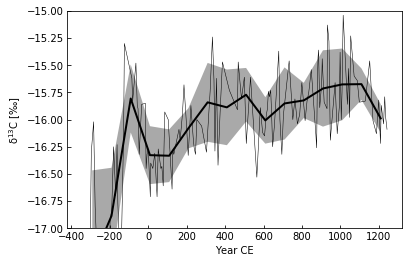

In [127]:
fig, ax = plt.subplots()
data_original = df_sav
data_binned = sav_binned_c

x = data_binned['yrAD']
y1 = data_binned['upper']
y2 = data_binned['lower']

ax.plot('yrAD', 'd13c', data=data_original, color = 'k', linewidth = 0.5)
ax.plot('yrAD', 'd13c', data=data_binned, color='k', linewidth = 2)
# ax.plot(x, y1, x, y2, color = 'darkgray', linewidth=1)

ax.fill_between(x, y1, y2, facecolor = 'darkgray', interpolate = True)

ax.tick_params(direction='in')

ax.set_xlabel("Year CE")
ax.set_ylabel(c)

# ax.set_xlim(-50, 1400)
ax.set_ylim(-17, -15)

# ax.set_xlim(0, max(df_sav['yrAD']))

plt.savefig('fig_bulk_c_sav_binned2.png', dpi = 300, bbox_inches = 'tight')

### Carbon and Nitrogen stacked plot

NameError: name 'jack4907_binned' is not defined

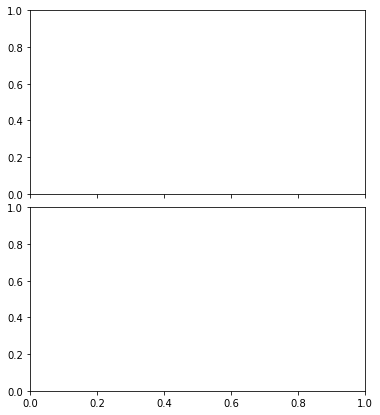

In [15]:
fig, axs = plt.subplots(2, sharex=True, figsize = (6,7), 
                       gridspec_kw={'hspace': 0.075})

binned_n = jack4907_binned
binned_c = jack_binned_c
data_orig = df_jack4907

x = binned_c['yrAD']
y1 = binned_c['upper']
y2 = binned_c['lower']
axs[0].plot('yrAD', 'd13c', data=data_orig, color = '#016c59', linewidth = 0.5, alpha = 0.5)
axs[0].plot('yrAD', 'd13c', data=binned_c, color='#016c59', linewidth = 1.25)
axs[0].fill_between(x, y1, y2, facecolor = '#016c59', interpolate = False, alpha = 0.25)

x = binned_n['yrAD']
y1 = binned_n['upper']
y2 = binned_n['lower']
axs[1].plot('yrAD', 'd15n', data=data_orig, color = '#0072B2', linewidth = 0.5, label = '', alpha = 0.5)
axs[1].plot('yrAD', 'd15n', data=binned_n, color='#0072B2', linewidth = 1.25, label = 'Jacksonville-4907 BC1')
axs[1].fill_between(x, y1, y2, facecolor = '#0072B2', interpolate = False, alpha = 0.25)

axs[0].set_ylabel(c, fontname = 'Helvetica')
axs[1].set_ylabel(n, fontname = 'Helvetica')
axs[1].set_xlabel('Year CE', fontname = 'Helvetica')

axs[0].set_ylim(-17,-14.5)

axs[0].tick_params(direction='in')
axs[1].tick_params(direction='in')

for tick in axs[0].get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in axs[0].get_yticklabels():
    tick.set_fontname("Helvetica")
    
for tick in axs[1].get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in axs[1].get_yticklabels():
    tick.set_fontname("Helvetica")

plt.savefig('fig_bulk_jack_combined.png', dpi = 300, bbox_inches='tight')

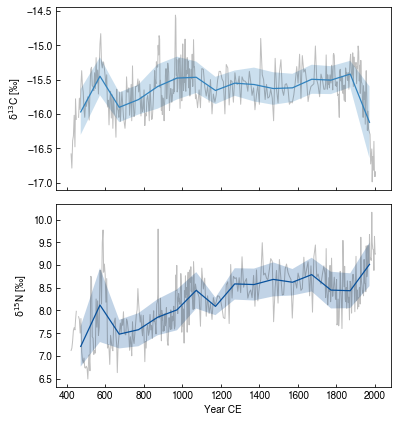

In [30]:
fig, axs = plt.subplots(2, sharex=True, figsize = (6,7), 
                       gridspec_kw={'hspace': 0.075})

binned_n = stet_binned
binned_c = stet_binned_c
data_orig = df_stet

x = binned_c['yrAD']
y1 = binned_c['upper']
y2 = binned_c['lower']
axs[0].plot('yrAD', 'd13c', data=data_orig, color = 'k', linewidth = 1, alpha = 0.25)
axs[0].plot('yrAD', 'd13c', data=binned_c, color='#3182bd', linewidth = 1.25)
axs[0].fill_between(x, y1, y2, facecolor = '#3182bd', interpolate = False, alpha = 0.25)

x = binned_n['yrAD']
y1 = binned_n['upper']
y2 = binned_n['lower']
axs[1].plot('yrAD', 'd15n', data=data_orig, color = 'k', linewidth = 1, alpha = 0.25)
axs[1].plot('yrAD', 'd15n', data=binned_n, color='#08519c', linewidth = 1.25, label = 'Stetson-4904 BC1')
axs[1].fill_between(x, y1, y2, facecolor = '#08519c', interpolate = False, alpha = 0.25)

axs[0].set_ylabel(c, fontname = 'Helvetica')
axs[1].set_ylabel(n, fontname = 'Helvetica')
axs[1].set_xlabel('Year CE', fontname = 'Helvetica')

# axs[0].set_ylim(-17,-14.5)

for tick in axs[0].get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in axs[0].get_yticklabels():
    tick.set_fontname("Helvetica")
    
for tick in axs[1].get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in axs[1].get_yticklabels():
    tick.set_fontname("Helvetica")

axs[0].tick_params(direction='in')
axs[1].tick_params(direction='in')

plt.savefig('fig_bulk_stet_combined.png', dpi = 300, bbox_inches='tight')

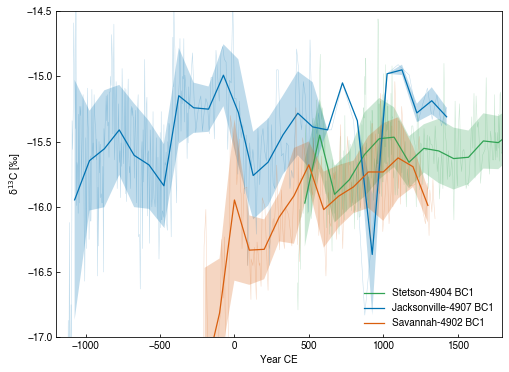

In [54]:
import matplotlib.font_manager as font_manager

fig, ax = plt.subplots(figsize = (8,6))

# Stetson-4904
x = stet_binned_c['yrAD']
y1 = stet_binned_c['upper']
y2 = stet_binned_c['lower']
ax.plot('yrAD', 'd13c', data=df_stet, color = '#31a354', linewidth = 0.5, label = '', alpha = 0.25)
ax.plot('yrAD', 'd13c', data=stet_binned_c, color='#31a354', linewidth = 1.25, label = 'Stetson-4904 BC1')
ax.fill_between(x, y1, y2, facecolor = '#31a354', interpolate = True, alpha = 0.25)

# Jacksonville-4907
x = jack_binned_c['yrAD']
y1 = jack_binned_c['upper']
y2 = jack_binned_c['lower']
ax.plot('yrAD', 'd13c', data=df_jack4907, color = '#0072B2', linewidth = 0.5, label = '', alpha = 0.25)
ax.plot('yrAD', 'd13c', data=jack_binned_c, color='#0072B2', linewidth = 1.25, label = 'Jacksonville-4907 BC1')
ax.fill_between(x, y1, y2, facecolor = '#0072B2', interpolate = False, alpha = 0.25)
ax.tick_params(direction='in')

# Savannah-4902
x = sav_binned_c['yrAD']
y1 = sav_binned_c['upper']
y2 = sav_binned_c['lower']
ax.plot('yrAD', 'd13c', data=df_sav, color = '#d95f0e', linewidth = 0.5, label = '', alpha = 0.25)
ax.plot('yrAD', 'd13c', data=sav_binned_c, color='#d95f0e', linewidth = 1.25, label = 'Savannah-4902 BC1')
ax.fill_between(x, y1, y2, facecolor = '#d95f0e', interpolate = False, alpha = 0.25)
ax.tick_params(direction='in')

ax.set_xlabel("Year CE", fontname = 'Helvetica')
ax.set_ylabel(c, fontname = 'Helvetica')

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")

ax.set_ylim(-17,-14.5)
ax.set_xlim(-1200,1800)

font = font_manager.FontProperties(family='Helvetica')

plt.legend(frameon=False, loc=0, prop = font)

plt.savefig('fig_bulk_c_grouped_binned.png', dpi = 300, bbox_inches='tight')